In [ ]:
#EJERCICIO 1

In [1]:
import os, geopandas as gpd
import pandas as pd

In [2]:
countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

DataSourceError: maps/World_Countries/World_Countries.shp: No such file or directory

In [ ]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# dimensions
countries.shape

(252, 2)

In [ ]:
# names
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [ ]:
# some content
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [ ]:
# what geometry?
countries.geom_type.unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

In [ ]:
# any missing values?
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [ ]:
# types
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


<Axes: >

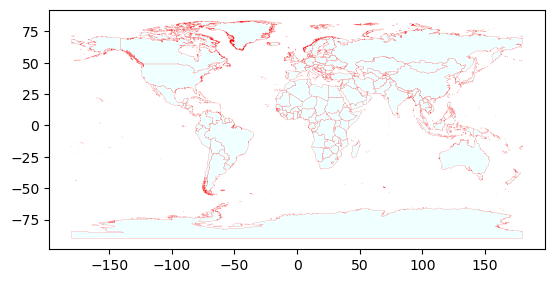

In [ ]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='red', #color of lines
               linewidth=0.1) #thickness of lines

In [ ]:
#Datos a importar:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [ ]:
rivers.geom_type.unique(), cities.geom_type.unique()

(array(['LineString', 'MultiLineString'], dtype=object),
 array(['Point'], dtype=object))

<Axes: >

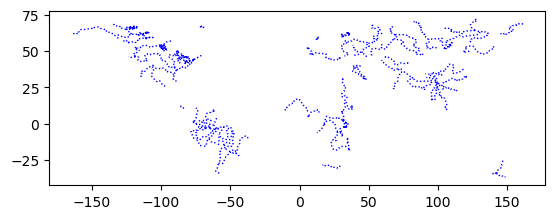

In [ ]:
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

<Axes: >

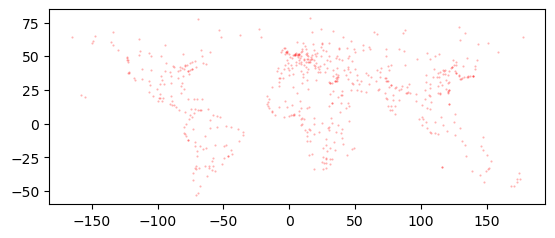

In [ ]:
cities.plot(marker='.', # marker type
            color='red',
            markersize=1,
            alpha=0.3) # transparency

<Axes: >

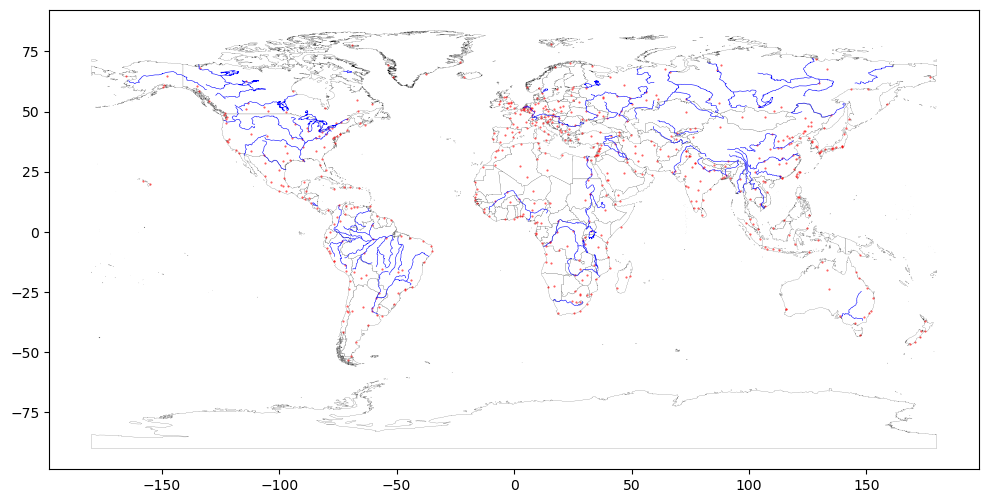

In [ ]:
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of...

In [ ]:
# ONE file - SEVERAL layers
import os

countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")

In [ ]:
##MAP PROYECT: Aqui empieza el ejercicio

In [ ]:
countries

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,South Sudan,"POLYGON ((34.21807 9.96458, 34.20722 9.905, 34..."
248,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,East Timor,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -..."
250,Curacao (Netherlands),"POLYGON ((-68.96556 12.19889, -68.91196 12.181..."


In [ ]:
UK=countries[countries.COUNTRY=='United Kingdom']

In [ ]:
UK.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# check units of measurement
UK.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [ ]:
# is this CRS projected?
UK.crs.is_projected

False

In [ ]:
# centroid
UK.centroid

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_20236\2316371778.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  UK.centroid


227    POINT (-2.89558 54.15535)
dtype: geometry

In [ ]:
# recommended for Brazil (meters)
UK.to_crs(27700).crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [ ]:
# now this works with no warning
UK.to_crs(27700).centroid

227    POINT (348608.541 461155.382)
dtype: geometry

<Axes: >

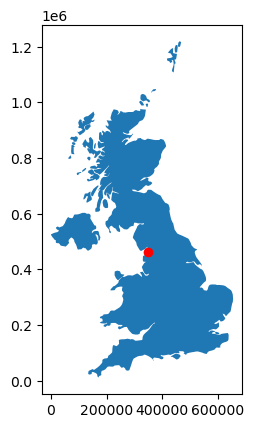

In [ ]:
base27700=UK.to_crs(27700).plot()
UK.to_crs(27700).centroid.plot(color='red',ax=base27700)

In [ ]:
cities_UK_27700=cities[cities.COUNTRY=='UK'].to_crs(27700)

In [ ]:
riversUK_clipped=gpd.clip(rivers,UK)

In [ ]:
UK_27700=UK.to_crs(27700)

rivers_UK_27700=riversUK_clipped.to_crs(UK_27700.crs)

In [ ]:
import os

UK_27700.to_file(os.path.join("maps","UKMaps_27700.gpkg"), layer='country', driver="GPKG")
cities_UK_27700.to_file(os.path.join("maps","riversUK_27700.gpkg"), layer='cities', driver="GPKG")
rivers_UK_27700.to_file(os.path.join("maps","UKMaps_27700.gpkg"), layer='rivers', driver="GPKG")

In [ ]:
#EJERCICIO 2: Aereopuertos

In [ ]:
infoairports=pd.read_csv(os.path.join("data","gb-airports.csv"))


infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:]

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,scheduled_service,gps_code,icao_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,2434,EGLL,large_airport,London Heathrow Airport,51.470600,-0.461941,83.0,EU,United Kingdom,GB,...,1,EGLL,EGLL,LHR,NaN,http://www.heathrowairport.com/,https://en.wikipedia.org/wiki/Heathrow_Airport,"LON, Londres",1251675,2022-10-18T18:48:50+00:00
1,2429,EGKK,large_airport,London Gatwick Airport,51.148771,-0.192089,202.0,EU,United Kingdom,GB,...,1,EGKK,EGKK,LGW,NaN,http://www.gatwickairport.com/,https://en.wikipedia.org/wiki/Gatwick_Airport,"LON, Crawley, Charlwood",1049275,2025-02-27T12:47:43+00:00
2,2476,EGSS,large_airport,London Stansted Airport,51.884998,0.235000,348.0,EU,United Kingdom,GB,...,1,EGSS,EGSS,STN,NaN,http://www.stanstedairport.com/,https://en.wikipedia.org/wiki/London_Stansted_...,LON,1012275,2023-12-04T14:28:14+00:00
3,2398,EGCC,large_airport,Manchester Airport,53.349375,-2.279521,257.0,EU,United Kingdom,GB,...,1,EGCC,EGCC,MAN,NaN,http://www.manchesterairport.co.uk/,https://en.wikipedia.org/wiki/Manchester_Airport,"Ringway Airport, RAF Ringway",1020475,2024-11-03T07:18:32+00:00
1565,331265,GB-0607,closed,RAF Tholthorpe,54.105959,-1.264926,62.0,EU,United Kingdom,GB,...,0,NaN,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/RAF_Tholthorpe,NaN,0,2024-12-05T09:54:40+00:00
1566,565469,GB-1170,heliport,Yorkshire Air Museum Heliport,53.926229,-0.966841,47.0,EU,United Kingdom,GB,...,0,NaN,NaN,NaN,NaN,https://yorkshireairmuseum.org/,NaN,NaN,0,2024-12-19T04:09:25+00:00
1567,575112,GB-1204,closed,RAF Clifton,53.990840,-1.108000,50.0,EU,United Kingdom,GB,...,0,NaN,NaN,NaN,NaN,NaN,NaN,"Clifton, Clifton Moor, RAF Rawcliffe, RAF York...",0,2025-01-29T22:02:12+00:00
1568,316494,GB-0229,closed,Kirkbymoorside Airfield,54.251000,-0.941274,111.0,EU,United Kingdom,GB,...,0,NaN,NaN,NaN,NaN,NaN,NaN,Slingsby,0,2024-08-15T12:22:55+00:00


In [ ]:
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,scheduled_service,gps_code,icao_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,2429,EGKK,large_airport,London Gatwick Airport,51.148771,-0.192089,202.0,EU,United Kingdom,GB,...,1,EGKK,EGKK,LGW,NaN,http://www.gatwickairport.com/,https://en.wikipedia.org/wiki/Gatwick_Airport,"LON, Crawley, Charlwood",1049275,2025-02-27T12:47:43+00:00
1,2476,EGSS,large_airport,London Stansted Airport,51.884998,0.235000,348.0,EU,United Kingdom,GB,...,1,EGSS,EGSS,STN,NaN,http://www.stanstedairport.com/,https://en.wikipedia.org/wiki/London_Stansted_...,LON,1012275,2023-12-04T14:28:14+00:00
2,2398,EGCC,large_airport,Manchester Airport,53.349375,-2.279521,257.0,EU,United Kingdom,GB,...,1,EGCC,EGCC,MAN,NaN,http://www.manchesterairport.co.uk/,https://en.wikipedia.org/wiki/Manchester_Airport,"Ringway Airport, RAF Ringway",1020475,2024-11-03T07:18:32+00:00
3,2462,EGPH,large_airport,Edinburgh Airport,55.950145,-3.372288,135.0,EU,United Kingdom,GB,...,1,EGPH,EGPH,EDI,NaN,http://www.edinburghairport.com/,https://en.wikipedia.org/wiki/Edinburgh_Airport,NaN,51275,2021-11-02T17:35:40+00:00
4,2419,EGGW,large_airport,London Luton Airport,51.874699,-0.368333,526.0,EU,United Kingdom,GB,...,1,EGGW,EGGW,LTN,NaN,http://www.london-luton.co.uk/en/,https://en.wikipedia.org/wiki/Luton_Airport,LON,51275,2025-02-24T18:59:30+00:00


In [ ]:
infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'icao_code', 'iata_code', 'local_code',
       'home_link', 'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [ ]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1568 non-null   object 
 1   type           1568 non-null   object 
 2   latitude_deg   1568 non-null   float64
 3   longitude_deg  1568 non-null   float64
 4   elevation_ft   938 non-null    float64
 5   region_name    1568 non-null   object 
 6   municipality   1335 non-null   object 
dtypes: float64(3), object(4)
memory usage: 85.9+ KB


In [ ]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

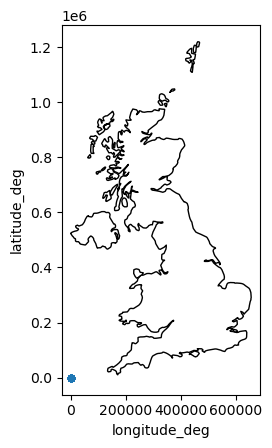

In [ ]:
#Mal ploteo
base = UK_27700.plot(color='white', edgecolor='black') #unprojected

# Mapa mal proyectado de aereopuertos
infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [ ]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=4326)

<Axes: >

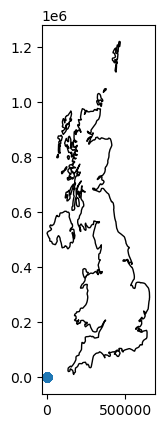

In [ ]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=4326)# coordenadas y grados (sin proyeccion al mapa original)

# Mapa mal proyectado de aereopuertos

base = UK_27700.plot(color='white', edgecolor='black')
airports.plot(ax=base)

<Axes: >

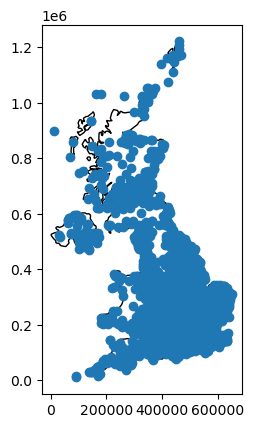

In [ ]:
airports_27700=airports.to_crs(27700)


#Mapa reproyectado de aereopuertos
base = UK_27700.plot(color='white', edgecolor='black', markersize=1)
airports_27700.plot(ax=base)

In [ ]:
airports_27700.crs

In [ ]:
airports_27700['type'].value_counts() # this will not work: airports.type.value_counts()

In [ ]:
airports_27700.rename(columns={'type':'kind'},inplace=True)

## Guaradado GPKG
airports_27700.to_file(os.path.join("maps","inglaterraMaps_27700.gpkg"), layer='airports', driver="GPKG")

In [ ]:
#EJERCICIO 3

In [ ]:
UK_27700

,COUNTRY,geometry
227,United Kingdom,"MULTIPOLYGON (((463756.802 1199461.295, 458260..."


In [ ]:
type(UK_27700.boundary)

geopandas.geoseries.GeoSeries

<Axes: >

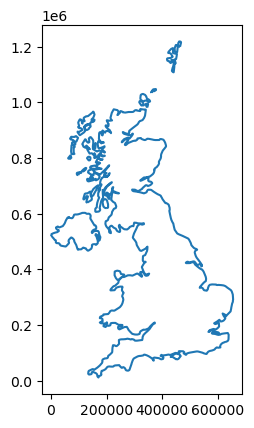

In [ ]:
#Solo los bordes
UK_27700.boundary.plot()

In [ ]:
# boundary retorna un GDF?
type(UK_27700.boundary)

geopandas.geoseries.GeoSeries

In [ ]:
#Convertimos
UK_27700.boundary.to_frame()

,0
227,"MULTILINESTRING ((463756.802 1199461.295, 4582..."


In [ ]:
UK_27700.boundary.to_frame().info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1 entries, 227 to 227
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       1 non-null      geometry
dtypes: geometry(1)
memory usage: 16.0 bytes


In [ ]:
# convercion
UK_border=UK_27700.boundary.to_frame()

# nueva columna
UK_border['name']='Brazil'

# geometria
UK_border.rename(columns={0:'geometry'},inplace=True)

#configuracion de geometria
UK_border = UK_border.set_geometry("geometry")

# verificamos
UK_border.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [ ]:
#EJERCICIO 4

In [ ]:
UK_border

,geometry,name
227,"MULTILINESTRING ((463756.802 1199461.295, 4582...",Brazil


In [ ]:
#EJERCICIO 3

In [ ]:
UK_regiones=gpd.read_file(os.path.join("maps","ITL_1","ITL1_JAN_2025_UK_BFC.shp"))
UK_condados=gpd.read_file(os.path.join("maps","ITL_2","ITL2_JAN_2025_UK_BFC.shp"))
UK_distritos=gpd.read_file(os.path.join("maps","ITL_3","International_Territorial_Level_3_(January_2025)_Boundaries_UK_BFC_V2.shp"))

In [ ]:
type(UK_regiones),type(UK_condados),type(UK_distritos)

(geopandas.geodataframe.GeoDataFrame,
 geopandas.geodataframe.GeoDataFrame,
 geopandas.geodataframe.GeoDataFrame)

In [ ]:
UK_regiones.head()

,ITL125CD,ITL125NM,BNG_E,BNG_N,LAT,LONG,GlobalID,geometry
0,TLC,North East (England),417317,575393,55.0727,-1.73036,883d3875-3b66-4060-b85f-3a91fe81e2f9,"MULTIPOLYGON (((450259.6 525943.8, 450261.4 52..."
1,TLD,North West (England),349989,463422,54.0643,-2.76560,712e3d99-d30d-4a7a-aa16-2ed86206a974,"MULTIPOLYGON (((327866.924 373722.305, 327869...."
2,TLE,Yorkshire and The Humber,452737,445838,53.9060,-1.19878,524442a2-0a4f-4445-9cb5-1163f51a386a,"MULTIPOLYGON (((495603.099 422511.497, 495629...."
3,TLF,East Midlands (England),477748,322635,52.7957,-0.84837,646d129c-88f9-4ab4-bfa9-15e551590d2d,"MULTIPOLYGON (((552751.427 326659.292, 552759...."
4,TLG,West Midlands (England),386293,295477,52.5570,-2.20360,bb6f534a-6049-41c1-a1e9-b9eb971c9621,"POLYGON ((445790.299 252455.405, 445782.903 25..."


In [ ]:
UK_condados.head()

,ITL225CD,ITL225NM,BNG_E,BNG_N,LAT,LONG,GlobalID,geometry
0,TLC3,Tees Valley,449140,521739,54.5885,-1.24112,31050e7e-fd0d-4ed4-8ffd-071632345546,"MULTIPOLYGON (((450259.6 525943.8, 450261.4 52..."
1,TLC4,"Northumberland, Durham and Tyne & Wear",402627,577731,55.0940,-1.96038,a823ed47-990e-4223-8195-f73348847456,"MULTIPOLYGON (((439170.69 557624.82, 439170.1 ..."
2,TLD1,Cumbria,341842,525692,54.6230,-2.90224,e8182039-7db8-47da-b31b-39c7c470009d,"MULTIPOLYGON (((321485.903 463795.299, 321473...."
3,TLD3,Greater Manchester,377929,401095,53.5061,-2.33424,ddc987f4-441e-4d53-9556-638d4d42f2f9,"POLYGON ((406087.197 404640.102, 406041.099 40..."
4,TLD4,Lancashire,362812,444720,53.8973,-2.56741,919d2406-9090-48eb-9aab-428eda32ab07,"MULTIPOLYGON (((337136.5 422474, 337133.067 42..."


In [ ]:
UK_distritos.head()

,FID,ITL325CD,ITL325NM,BNG_E,BNG_N,LAT,LONG,Shape__Are,Shape__Len,GlobalID,geometry
0,1,TLC31,Hartlepool and Stockton-on-Tees,444955,522013,54.59133,-1.30583,2.988302e+08,170566.054415,84c38a7b-d2d5-40c3-8318-03b9e802688e,"MULTIPOLYGON (((447177.704 517811.797, 447176...."
1,2,TLC32,South Teesside,461690,519596,54.56785,-1.04739,2.989886e+08,113668.576367,389163d9-2470-49b2-9711-c6721b4bbc1a,"MULTIPOLYGON (((446854.7 517192.7, 446854.281 ..."
2,3,TLC33,Darlington,428029,515648,54.53534,-1.56836,1.974895e+08,107285.227956,4d1c9dc6-ea76-417c-b42f-a4ebc0af353b,"POLYGON ((436388.002 522354.197, 436392.298 52..."
3,4,TLC41,Durham,410383,532242,54.68513,-1.84048,2.230843e+09,315818.035374,83db22e9-8b52-4968-9671-5ae6fbf40374,"POLYGON ((428366.003 554230.403, 428358.203 55..."
4,5,TLC42,Northumberland,395323,600700,55.30038,-2.07522,5.032309e+09,605682.922003,da42f065-4f21-4705-a9b8-ac77b762a4e4,"MULTIPOLYGON (((429380.896 604848.303, 429384...."


In [ ]:
UK_regiones.crs,UK_condados.crs, UK_distritos.crs

(<Projected CRS: EPSG:27700>
 Name: OSGB36 / British National Grid
 Axis Info [cartesian]:
 - E[east]: Easting (metre)
 - N[north]: Northing (metre)
 Area of Use:
 - name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
 - bounds: (-9.01, 49.75, 2.01, 61.01)
 Coordinate Operation:
 - name: British National Grid
 - method: Transverse Mercator
 Datum: Ordnance Survey of Great Britain 1936
 - Ellipsoid: Airy 1830
 - Prime Meridian: Greenwich,
 <Projected CRS: EPSG:27700>
 Name: OSGB36 / British National Grid
 Axis Info [cartesian]:
 - E[east]: Easting (metre)
 - N[north]: Northing (metre)
 Area of Use:
 - name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
 - bounds: (-9.01, 49.75, 2.01, 61.01)
 Coordinate Operation:
 - name: British National Grid
 - method: 

<Axes: >

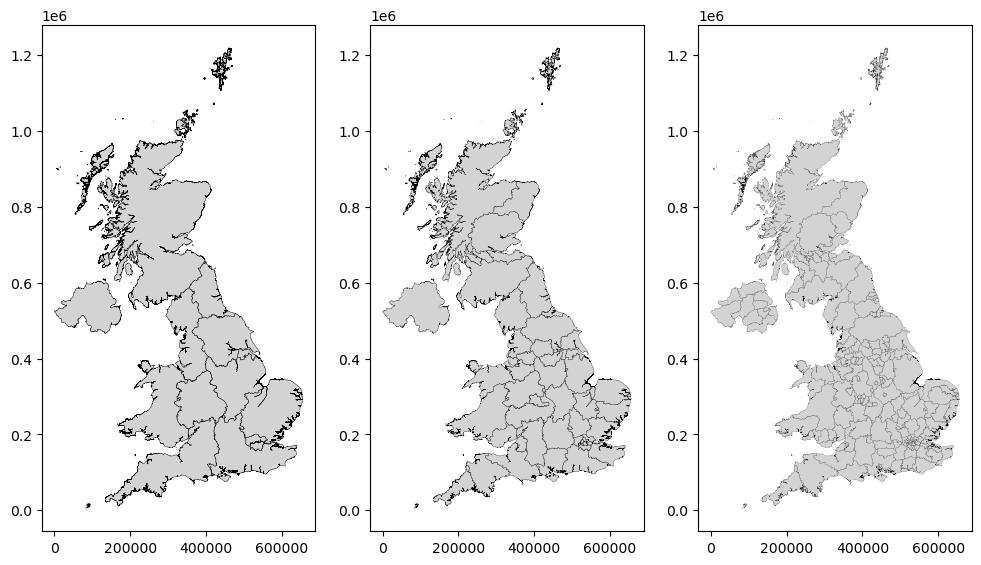

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=False, sharey=False, figsize=(12,12))

UK_regiones.plot(ax=ax1, facecolor='lightgrey', edgecolor='black',linewidth=0.3)
UK_condados.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)
UK_distritos.plot(ax=ax3, facecolor='lightgrey', edgecolor='black',linewidth=0.1)

In [ ]:
UK_regiones.to_file(os.path.join("maps","UKMaps_27700.gpkg"), layer='regiones', driver="GPKG")
UK_condados.to_file(os.path.join("maps","UKMaps_27700.gpkg"), layer='condados', driver="GPKG")
UK_distritos.to_file(os.path.join("maps","UKMaps_27700.gpkg"), layer='distritos', driver="GPKG")

In [ ]:
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [ ]:
#Ejercicio 5

In [ ]:
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [ ]:
fragilityCiaLink="https://github.com/CienciaDeDatosEspacial/merging/raw/main/FragilityCia_isos.csv"

fragilityCia=pd.read_csv(fragilityCiaLink)

fragilityCia.head()

,Country,Officialstatename,InternetccTLD,iso2,iso3,fragility,co2,region,ForestRev_gdp
0,AFGHANISTAN,The Islamic Republic of Afghanistan,.af,AF,AFG,105.0,7893000.0,SOUTH ASIA,0.20
1,ALBANIA,The Republic of Albania,.al,AL,ALB,58.9,3794000.0,EUROPE,0.18
2,ALGERIA,The People's Democratic Republic of Algeria,.dz,DZ,DZA,75.4,151633000.0,AFRICA,0.10
3,ANGOLA,The Republic of Angola,.ao,AO,AGO,87.8,19362000.0,AFRICA,0.36
4,ANTIGUA AND BARBUDA,Antigua and Barbuda,.ag,AG,ATG,54.4,729000.0,CENTRAL AMERICA AND THE CARIBBEAN,0.00


In [ ]:
countries['COUNTRY']=countries.COUNTRY.str.upper()

In [ ]:
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

In [ ]:
onlyFragilCia

{'BAHAMAS (THE)',
 'BOLIVIA (PLURINATIONAL STATE OF)',
 'BRUNEI DARUSSALAM',
 'CABO VERDE',
 'CENTRAL AFRICAN REPUBLIC (THE)',
 'COMOROS (THE)',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
 'CONGO (THE)',
 "CÔTE D'IVOIRE",
 'DOMINICAN REPUBLIC (THE)',
 'ESWATINI',
 'GAMBIA (THE)',
 'IRAN (ISLAMIC REPUBLIC OF)',
 'KOREA (THE REPUBLIC OF)',
 "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
 'MICRONESIA (FEDERATED STATES OF)',
 'MOLDOVA (THE REPUBLIC OF)',
 'NETHERLANDS (THE)',
 'NIGER (THE)',
 'NORTH MACEDONIA',
 'NORTHERN MARIANA ISLANDS (THE)',
 'PHILIPPINES (THE)',
 'RUSSIAN FEDERATION (THE)',
 'SAMOA',
 'SUDAN (THE)',
 'TANZANIA, THE UNITED REPUBLIC OF',
 'TIMOR-LESTE',
 'UNITED ARAB EMIRATES (THE)',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)',
 'UNITED STATES OF AMERICA (THE)',
 'VIET NAM'}

In [ ]:
onlyMap

{'AMERICAN SAMOA (US)',
 'AMERICAN VIRGIN ISLANDS (US)',
 'ANDORRA',
 'ANGUILLA (UK)',
 'ANTARCTICA',
 'ARUBA (NETHERLANDS)',
 'BAHAMAS',
 'BAKER ISLAND (US)',
 'BERMUDA (UK)',
 'BOLIVIA',
 'BONAIRE (NETHERLANDS)',
 'BOUVET ISLAND (NORWAY)',
 'BRITISH INDIAN OCEAN TERRITORY (UK)',
 'BRITISH VIRGIN ISLANDS(UK)',
 'BRUNEI',
 'CAPE VERDE',
 'CAYMAN ISLANDS (UK)',
 'CENTRAL AFRICAN REPUBLIC',
 'CHRISTMAS ISLAND (AUSTRALIA)',
 'COCOS (KEELING) ISLANDS (AUSTRALIA)',
 'COMOROS',
 'CONGO',
 'COOK ISLANDS (NEW ZEALAND)',
 'CURACAO (NETHERLANDS)',
 'CZECH REPUBLIC',
 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'EAST TIMOR',
 'ERITREA',
 'FALKLAND ISLANDS (UK)',
 'FAROE ISLANDS (DENMARK)',
 'FEDERATED STATES OF MICRONESIA',
 'FRENCH GUIANA (FRANCE)',
 'FRENCH POLYNESIA (FRANCE)',
 'FRENCH SOUTHERN & ANTARCTIC LANDS (FRANCE)',
 'GAMBIA',
 'GIBRALTAR (UK)',
 'GLORIOSO ISLANDS (FRANCE)',
 'GREENLAND (DENMARK)',
 'GUADELOUPE (FRANCE)',
 'GUAM (US)',
 'GUERNSEY (UK)',
 'HE

In [ ]:
DataNames=['fragility', 'co2', 'ForestRev_gdp']

In [ ]:
pd.melt(theMapAndData[DataNames])

NameError: name 'theMapAndData' is not defined